<a href="https://colab.research.google.com/github/jdansb/Econophysics/blob/main/files/monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eu estava decidido a utilizar este espaço para fazer discussões apenas quantitativas acerca dos modelos de econofísica, visando principalmente compartilhar códigos e o desenvolvimento matemático destes modelos. Tive este pensamento pois eu estava considerando que não tenho capacidade de fazer uma discussão conceitual acerca de economia. Porém, acredito que existem algumas discussões conceituais dentro da econofísica que devem ser lembradas. É assim que eu decidi trazer um artigo sobre a [Philosophy of Econophysics](https://github.com/jdansb/Econophysics/blob/main/files/Filosofia%20da%20Econof%C3%ADsica.md) e hoje eu quero trazer o artigo [Monetary economics from econophysics perspective](https://arxiv.org/abs/1608.04832) escrito por Victor M. Yakovenko, onde como ele mesmo diz: "the style of this paper is quite informal, and the primary focus is on conceptual foundation, rather than technical details of mathematical models and empirical data."

Coomo seu modelo tem uma importância indiscutível no estabelecimento do problema da desigualdade da distribuição de riqueza como um dos principais objetos de estudo na econofísica, eu acredito ser interesante conhecermos esta discussão conceitual sobre seus modelos. Outro artigo que eu ainda quero trazer do mesmo autor é a entrada [Statistical Mechanics Approach to Econophysics](https://physics.umd.edu/~yakovenk/papers/2022.Yakovenko.SpringerEncyclopedia.pdf) na Encyclopedia of Complexity and Systems Science. Mas por hora, vamos focar no presente artigo. Assim como no caso anterior, meu texto não deve ser mais do que um resumo do trabalho completo onde tento compilar os trechos que considero mais importante.

Apesar de não ser esta a parte que mais mais me interessa no momento, eu gostaria de destacar um trecho, o resultado do modelo de Yakovenko indica que:

> …há poucos agentes ricos com alto saldo monetário e muitos agentes pobres com baixo saldo, portanto, a distribuição é altamente desigual, mesmo que os agentes sejam estatisticamente iguais. Esta é uma conclusão chocante para as ciências sociais, onde a desigualdade é geralmente atribuída a diferenças intrínsecas entre os agentes.

Agora sim avançando para o debate conceitual, há uma crítica sobre o fato de que muitos economistas não estão totalmente familiarizados ao conceito de equilíbrio estatístico, mas apenas no equilíbrio mecânico. Mas para avançar, precisamos começar com a definição de dinheiro: dinheiro é então apenas uma contabilidade digital, uma ficha (token) digital, isto é, que pode ser expressado por um número. Além disso, pelo próprio funcionamento do dinheiro, ele deve ser necessariamente conservado, então isto não é um artefato peculiar, mas um princípio fundamental de contabilidade no qual a funcionalidade do dinheiro é baseado. Isto é, os agentes envolvidos não podem produzir e destruir dinheiro.

Isso se tora explícito quando listamos as três propriedades do dinheiro: meio de troca, medida de valor e armazenamento de valor, que só faz sentido se o dinheiro for conservado. Essas propriedades seriam perdidas se os agentes fossem capazes de produzir o próprio dinheiro.

Há uma discussão interessante sobre como o dinheiro  pode surgir em um sistema que os agentes não podem produzir ele.  Suponhamos que temos um sistema onde todos agentes tem 0 dinheiro, mas quando um agente fornece um serviço a outro, o saldo de ambos agentes se altera de forma conservativa, isto é, podemos simplesmente fazer um registro que um agente agora tem um balanço negativo por ter ‘pago’ e outro agente tem um balanço positivo por  ter ‘recebido’, é apenas uma questão de contabilidade. Porém, o que acontece nesse sistema se não possuir um limite inferior de balanço negativo? Eu posso ficar usufruindo eternamente do serviço alheio?  Neste sentido é necessário impor um limite mínimo, no qual assim que um agente atinge este balanço, ele não pode mais receber serviços sem realizar.

Neste momento, podemos simplificar o dinheiro deslocando todos balanços de forma que o limite negativo agora seja zero. Isto equivale a dar inicialmente  a cada agente uma quantidade de dinheiro inicial em módulo igual ao limite mínimo. Assim o balanço mínimo agora é zero, e o balanço inicial (ou então, agora o dinheiro inicial) é uma quantidade maior que zero.  Como o agora o dinheiro é positivo, podemos inclusive utilizar objetos físicos como símbolos do dinheiro. Vale ressaltar que Yakovenko cita a Teoria Moderna do Dinheiro (MMT) como referência de discussão sobre como o dinheiro em escala nacional é criado. O que considero mais interessante, são duas coisas. A primeira conforme já citado, é de que a condição inicial de balanço monetário entre os agentes, mesmo que os mesmos sejam iguais estatisticamente, não leva a uma distribuição igualitária de dinheiro. E a segundo é, citando Yakovenko:

> A escola econômica laissez-faire argumenta que, se todas as restrições e regulamentações forem removidas, a economia alcançará um equilíbrio natural e deverá permanecer assim. No entanto, esse argumento é enganoso, pois um equilíbrio não pode ser alcançado sem a imposição de condições de contorno, ou seja, regulamentações.

Para contextualizar a discussão, podemos gerar um código simples. Primeiro, vamos construir um modelo onde temos N agentes com 10 moedas cada, a cada paso selecionamos 2 agentes aleatoriamente e transferimos uma moeda de um agente para outro. O resultado para três instantes de tempo diferente pode ser vito abaixo. Mas o que podemos ver, é que este sistema sem restrição não atinge em equilíbrio, conforme o tempo avança a curva no histograma se torna mais 'plana', sem nunca atingir um equilíbrio, pois é sempre possível que um agente aumente sua dívida até estar com uma dívida infinita.

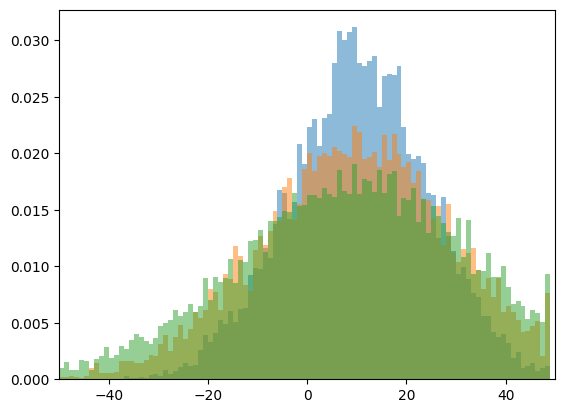

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    M[a] = M[a] - 1
    M[b] = M[b] + 1
  return M

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*100))

bins = np.arange(-50, 50, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-50,50])
plt.show()



Abaixo realizamos uma simulação semelhante, mas agora coloamos um limite inferior de 0. Isto é, um agente não pode contrair dívidas. Se a riqueza de um dado agente é 0, ele só ganhar moedas, e não ceder. Dois resultados aqui podem serem observados:
1 - O sistema entra em equilíbrio: podemos observar que o histograma pra 3 instantes de tempo é qualitativamente  mesmo.
2 - Ainda que as condições inicais e de troca sejam iguais, a distribuição final de riqueza é altamente desigual.

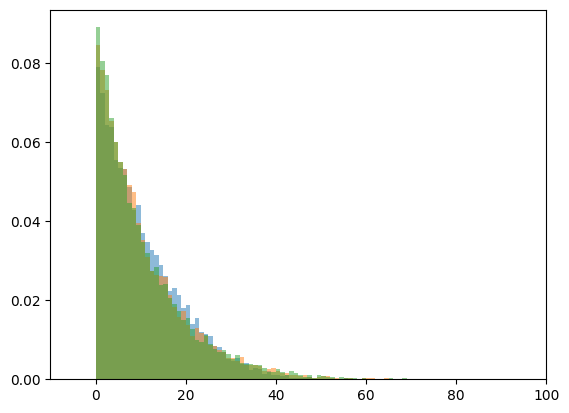

In [2]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s,min):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    if(M[a]>min):
      M[a] = M[a] - 1
      M[b] = M[b] + 1
  return M

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*100,0))

bins = np.arange(-10, 100, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-10,100])
plt.show()



Invertendo nossa discussão, podemos ver que se movermos o limite mínimo de 0 para -10, e forma equivalente agora a riqueza inicial também é 10 unidades menores que no caso anterior, ist é, cada agente começa com 0 moedas. Podemos notar que o resultado é análogo ao caso anterior, apenas deslocado 10 unidades para a esquerda.

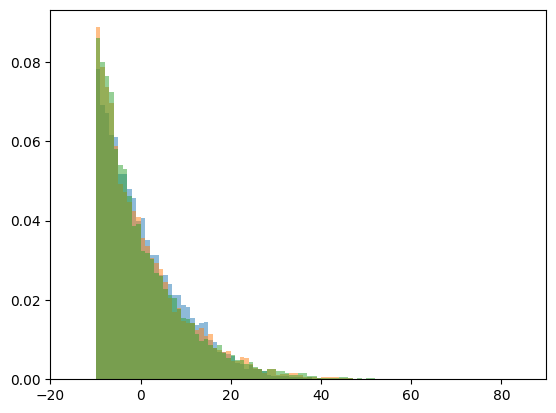

In [3]:
# @title
M=[]
for x in range(3):
  M.append(simulacao(0,(x+1)*100,-10))

bins = np.arange(-20, 90, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-20,90])
plt.show()


O artigo traz uma lista de falácias que eu vou tentar trabalhar a partir de agora.

**Falácia 1**: O dinheiro cresce como resultado de investimento. Sobre isto, é citado um exemplo onde alega-se que por exemplo, ao comprar \$100 de ouro, e anos depois vender por \$200, o dinheiro aumentou.

Para avançarmos a discussão precisamos distinguir  o que o autor chama de duas camadas: há uma camada física na sociedade, onde situam todas as coisas com existência física, e outra camada monetária, isto é, relacionada ao dinheiro, que é uma camada informacional. As duas camadas estão acopladas e relacionadas mas não são exatamente a mesma coisa. Neste exemplo temos uma transação de ouro na camada física e uma transação monetária na camada informacional.

Neste caso, é preciso considerar todos agentes envolvidos. Se olhar de uma perspectiva individual 'parece' que o dinheiro aumentou, mas porque estamos olhando para um único indivíduo. Nada neste exemplo em nenhum lugar necessariamente o dinheiro deixa de ser conservado se olharmos o sistema como um todo. Mesmo que eu entregue \$100 para um agente em troca de ouro, e então entregue ouro para outro agente em troca de \$200, e mesmo que os agentes não tenham interagido entre si, no caso mais extremo, só implica na restrição da existência de $300 no sistema desde o começo. Outro exemplo envolvendo pension funds investment é abordado no paper, assim como a seguinte recomendação de leitura: H. S. Dent, The Great Boom Ahead (Hyperion, New York, 1993).

**Falácia 2**: O dinheiro cresce como resultado da produção. Se o dinheiro é uma forma de medir a riqueza,  e se a riqueza coletiva aumenta no tempo como resultado da produção, então o dinheiro deveria aumentar também.

Porém o aumento na produção, a expansão da camada física não se traduz imediatamente na expansão da camada monetária, elas são diferentes e seguem regras diferentes. Esse tipo de argumento é normalmente trazido pela escola monetária de economia.


**Falácia 3**: A terceira falácia é sobre modelos econômicos sem dinheiro. O argumento é que a maior parte das crises econômicas recentes são na camada monetária, e não na física. Então se tentarmos eliminar o dinheiro do modelo, assumindo um funcionamento ideal, não podemos explicar as crises econômicas. Mas por outro lado, podemos reduzir o modelo à transferência de dinheiro entre os agentes (abstraindo questões de produção) e obter resultados interessantes, isso é por exemplo a abordagem adotada no modelo do The Social Architecture of Capitalism (Ian Wright)que tenho uma grande estima.

Chegamos agora a provavelmente um dos temas mais relevantes que é a criação do dinheiro pelo estado. Quando se pensa sobre o dinheiro ser conservativo (ou não) este é um dos principais pontos a serem levantados, afinal, o estado tem a capacidade (que de fato põe em prática) de produzir dinheiro. Então é natural nos perguntar como conciliar esta capacidade estatal com um modelo conservativo de dinheiro. Neste sentido, Yakovenko define então o sistema econômico como o conjunto de agentes privados onde o estado está fora do sistema. Neste caso o sistema é conservativo, ainda que a grandeza total não se mantenha conservada devido ao fluxo de entrada e saída da interação do sistema com componentes externos a ele. Ou seja, quando se constrói um modelo de um sistema econômico, o estado é considerado externo ao sistema e nesta condição, o dinheiro se conserva.

Entramos então em uma discussão sobre as motivações ou necessidade do estado injetar dinheiro no sistema. Uma razão dentre muitas é até mesmo o crescimento da população. Se a população cresce mas a quantidade de dinheiro  não, então o dinheiro per capita vai decrescer, de forma que o poder de compra de uma mesma quantidade de dinheiro aumenta. Essa consequentemente diminuição nos preços é chamada de deflação, e assim que um agente perceber este fenômeno, ele pode se sentir estimulado  a guardar o dinheiro pois poderá comprar mais produtos no futuro, retirando mais dinheiro de circulação e acentuando a deflação. Então pode-se argumentar que o estado deveria aumentar a quantidade de dinheiro, pelo menos, em proporção com N. Até mesmo a escola monetária propôs uma regra monetária de injeção constante de dinheiro de acordo com um cronograma regular, argumentando que uma moderada inflação estimula a economia.

Se seguirmos um conceito e que o dinheiro deve ser adquirido pelo trabalho, a melhor forma do estado injetar novo dinheiro é financiando projetos de infraestrutura pública que irão beneficiar toda sociedade.  Parte do financiamento desses projetos também podem ser pagos por impostos coletados pelo estado, a proporção entre ambos é uma questão técnica e prática, e não um dogma do tipo “balanço governamental equilibrado.” Um exemplo prático destes gastos são os gastos militares. Somente o governo pode pagar pelo enorme preço dos mísseis balísticos que ninguém quer usar, o complexo industrial-militar tem sido o principal motor da economia americana por muitos anos, milhares de dólares de novo dinheiro tem sido criado para pagar por guerras.

Dentro do estado, o governo é apenas um braço executivo e usualmente separado do banco central que tem autoridade monetária, isso significa que usualmente o governo não imprime dinheiro por si próprio. Assim o governo consegue recursos coletando impostos, taxas ou pegando emprestado emitindo títulos públicos por exemplo. Neste último caso, agentes privados emprestam dinheiro  para o governo de forma que não alteram o dinheiro total no sistema. Nos EUA, o governo está quase sempre em déficit, emitindo novos títulos para pagar os antigos, um dinheiro novo é injetado no sistema quando a Reserva Federal (Banco Central) compra os títulos públicos. Porém, a Reserva Federal tem permissão para comprar títulos diretamente do governo, apenas de bancos comerciais, gerando então o mesmo fluxo, porém pagando taxas para os bancos pela intermediação.

Além disso, como os títulos públicos estipulam,ao final do prazo o governo devolve ao Banco Central o dinheiro correspondente ao título público com juros, porém o Banco Central devolve este lucro ao governo, o resultado é que o processo representa um empréstimo sem juros do Banco Central para o governo. Dessa forma, o Banco Central é capaz tanto de injetar dinheiro no sistema quando compra título público, quanto de também remover quando o governo paga o título.

Ou seja, este é um sistema econômico que frequentemente depende da injeção de novo dinheiro no sistema, o que pode ser feito principalmente através de gastos públicos. Os EUA acabaram priorizando a indústria militar como um dos motores da economia. Em teoria, poderíamos imaginar outros tipos de gasto público, mas a guerra, além de permitir a injeção de dinheiro em grandes volumes, ainda pode trazer ganhos políticos como "bônus" (por exemplo, desestabilização de nações consideradas inimigas) e até mesmo ganhos econômicos indiretos, como o financiamento da reconstrução de infraestrutura destruída ou a imposição de acordos comerciais mais favoráveis.

Além disso, essa injeção de dinheiro é operacionalizada pelo Banco Central, que compra títulos públicos do governo no mercado secundário, criando um mecanismo em que o Banco Central injeta dinheiro na economia ao adquirir esses títulos. Os lucros desses títulos — principalmente os juros — são posteriormente repassados de volta ao governo, o que acaba gerando um efeito similar a um empréstimo com custo muito baixo. Esse processo também permite ao Banco Central tanto injetar quanto remover dinheiro da economia, dependendo da necessidade.

No entanto, como essa compra não pode ser feita diretamente do governo, entram em cena os bancos comerciais (geralmente privados), que atuam como intermediários no processo. Essa intermediação lhes garante ganhos relevantes, seja por meio da revenda dos títulos ao banco central ou por lucros com operações relacionadas, o que reforça sua posição no sistema financeiro.

Acredito que aqui já discutimos o que tinha de mais importante na minha opinião, o resto do artigo parece discutir a questão do débito. Mas ainda há quase metade do artigo (de 23 páginas, estamos na 13), então vamos fazer alguns comentários adicionais. Talvez o próximo item que merece uma menção é listado como a falácia dos modelos econômicos no qual as dívidas são sempre pagas como prometidas (falácia 10). Por um lado,se este é o caso, podemos simplesmente omitir, como é assumido implicitamente em muitos modelos. Porém alguns agentes não serão capazes de pagar, a análise matemática (que eu omiti, mas quem tiver interesse pegue o artigo original) indica que a criação de débito é um processo estatisticamente irreversível. Uma vez que a dívida é criada, ela não pode ser paga para todo o sistema.

Uma outra observação, é que uma vez que entendemos o funcionamento dos bancos, Yakovenko defende que eles não têm capacidade de criar dinheiro (apenas dívidas). Porém seu modus operandi funciona de forma que é do interesse do banco comercial gerar uma crise de escala catastrófica de forma que banco central sinta ser necessário intervir e injetar dinheiro nos bancos comerciais. Citando o artigo: “Assim, chega-se à conclusão de que a criação de crises em larga escala é parte essencial do atual modus operandi do sistema financeiro”, pois este processo é, em poucas palavras, lucrativo para os bancos. É talvez uma curiosidade interessante, que o Banco Central (no caso do artigo, dos EUA) só pode negociar com os bancos comerciais, então o novo dinheiro emitido por ele vai inevitavelmente para os bancos (e consequentemente banqueiros e a classe alta), aumentando a desigualdade na sociedade.

Por fim, chegamos no último tópico. Onde temos citações especiais para Karl Marx e O Capital. Mas em resumo, se a classe dos capitalistas  paga salário para a classe dos trabalhadores e esta classe usa este salário para comprar os produtos vendidos pelos próprio capitalistas, capitalistas individuais podem ter lucro a partir da perda de competidores que tiveram menos sucesso, mas a classe de capitalistas como um todo não poderia ter lucro.  Yakovenko defende então que dia mais cedo ou mais tarde, o sistema vai entrar em uma crise catastrófica.E neste ponto, o estado (o governo e o banco central) vão intervir e injetar dinheiro no sistema, produzindo então o lucro. Dessa forma, conclui-se que a última fonte do lucro monetário do capitalista é o dinheiro do estado. Vale lembrar que Yakovenko parece realizar sua análise a partir de uma perspectiva que se apoia na MMT. Ou seja, por um lado, não é uma leitura marxista do dinheiro e do estado, e por outro lado, não é uma leitura marxista do dinheiro e do estado, e mesmo assim, podemos notar os problemas estruturais que estão presentes no capitalismo.